In [69]:
import matplotlib.pyplot as plt

In [599]:
import numpy as np
def initialize_network(input_size, hidden_sizes, output_size):
    """
    Initialize weights and biases for a neural network.
    Args:
        input_size: Number of inputs to the network.
        hidden_sizes: List of neurons in each hidden layer (n, m, l...) size of layer n, size of layer m
        etc.
        output_size: Number of outputs of the network.
    Returns:
    List of (weights, biases) tuples for each layer.
    """
    layer_sizes = [input_size] + hidden_sizes + [output_size]
    #print('Layer sizes:',layer_sizes)
    network = []
    for i in range(len(layer_sizes) - 1):
        # weights = np.random.randn(layer_sizes[i + 1], layer_sizes[i]) * 0.1
        weights = np.random.randn(layer_sizes[i + 1], layer_sizes[i])
        # This creates a 2D array of random values with shape (layer_sizes[i + 1], layer_sizes[i]),
        # where each entry represents the weight connecting a neuron in the current layer to a
        # neuron in the next layer.
        biases = np.zeros(layer_sizes[i + 1])
        network.append((weights, biases))
    return network

Escriba un pequeño codigo que inicialice la red y le permita verificar su forma y la cantidad de
weights y bias. Juegue alterando los valores de entrada hasta convencerse de que entiende
como es inicializada la red.

In [466]:
nw = initialize_network(1, [2,3], 1)
print(nw)

Layer sizes: [1, 2, 3, 1]
[(array([[0.03196747],
       [0.12371157]]), array([0., 0.])), (array([[-0.10581423, -0.09966468],
       [ 0.05291911, -0.06817258],
       [-0.01173403,  0.02585148]]), array([0., 0., 0.])), (array([[-0.09184905,  0.00181846, -0.22004389]]), array([0.]))]


In [467]:
print('L1, weights (rows, columns): ', nw[0][0].shape)
print('L1, biases: ', nw[0][1].shape, '\n')
print('L2, weights (rows, columns): ', nw[1][0].shape)
print('L2, biases: ', nw[1][1].shape, '\n')
print('L3, weights (rows, columns): ', nw[2][0].shape)
print('L3, biases: ', nw[2][1].shape)

L1, weights (rows, columns):  (2, 1)
L1, biases:  (2,) 

L2, weights (rows, columns):  (3, 2)
L2, biases:  (3,) 

L3, weights (rows, columns):  (1, 3)
L3, biases:  (1,)


In [468]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return (x > 0) * x

def forward_layer_batch(inputs, weights, biases):
    """
    Perform a forward pass for a layer with a batch of inputs.
    Args:
    inputs: Input to the layer (2D array: batch_size x input_features).
    weights: Weights of the layer (2D array: neurons x input_features).
    biases: Biases of the layer (1D array: neurons).
    Returns:
    Outputs of the layer (2D array: batch_size x neurons).
    """
    z = np.dot(inputs, weights.T) + biases # Weighted sum (broadcast biases)
    return sigmoid(z)
    #return relu(z)

def forward_network_batch(inputs, network):
    """
    Perform a forward pass through the network for a batch of inputs.
    Args:
    inputs: Input to the network (2D array: batch_size x input_features).
    network: List of (weights, biases) for each layer.
    Returns:
    Activations for all layers.
    """
    activations = [inputs]
    for weights, biases in network:
        inputs = forward_layer_batch(inputs, weights, biases)
        activations.append(inputs)
    return activations

Ejercicio 1.2.1

Escriba un codigo que dados los valores de entrada de la función (puede usar el
intervalo -1 a 1, espaciado en 0.1), lo que serìa un batch, realice el fwd_pass para una dada red
inicializada al azar y grafique el resultado. Grafique ademas la función correcta. Pruebe
diferentes arquitecturas. ¿cree que es posible solo por azar obtener una red que recupere la
función?

In [469]:
# Function to replicate
def fun(x):
    if -1 <= x < -0.33:
        res = 0
    elif -0.33 <= x < 0.33:
        res = 1
    elif 0.33 <= x <= 1:
        res = 0.5
    return res

y = np.array([fun(x) for x in np.arange(-1, 1, 0.1)])


In [470]:
x = np.arange(-1, 1, 0.1).reshape(-1,1)

# Arquitectura 1*2*3*1
nw = initialize_network(1, [2,3], 1)
activation = forward_network_batch(x, nw)

Layer sizes: [1, 2, 3, 1]


In [471]:
activation[3]

array([[0.54850625],
       [0.54850392],
       [0.5485016 ],
       [0.54849927],
       [0.54849695],
       [0.54849462],
       [0.5484923 ],
       [0.54848997],
       [0.54848764],
       [0.54848532],
       [0.54848299],
       [0.54848066],
       [0.54847834],
       [0.54847601],
       [0.54847368],
       [0.54847136],
       [0.54846903],
       [0.5484667 ],
       [0.54846438],
       [0.54846205]])

In [472]:
y_pred = activation[-1]


In [473]:
# Arquitectura 1*2*3*4*1
nw1 = initialize_network(1, [10, 5], 1)
activation1 = forward_network_batch(x, nw1)
y_pred1 = activation1[-1]

Layer sizes: [1, 10, 5, 1]


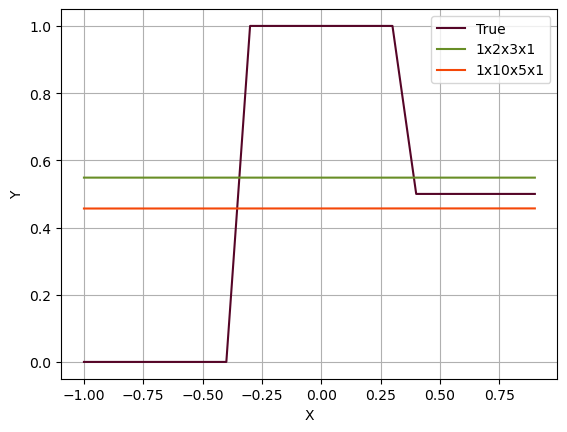

In [474]:
plt.plot(x, y, color = '#550527', label = 'True')
plt.plot(x, y_pred, color = '#688E26', label = '1x2x3x1')
plt.plot(x, y_pred1, color = '#F44708', label = '1x10x5x1')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


In [475]:
# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


def relu_derivative(x):
    return (x > 0) * 1

# Root Mean Squared Error (RMSE) loss function
def rmse_loss(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

def backward_layer_batch(inputs, weights, d_loss, activation_derivative):
    """
    Perform a backward pass for a layer with a batch of inputs.
    Args:
    inputs: Input to the layer (2D array: batch_size x input_features).
    weights: Weights of the layer (2D array: neurons x input_features).
    biases: Biases of the layer (1D array: neurons).
    d_loss: Gradients of the loss w.r.t. layer outputs (2D array: batch_size x neurons).
    activation_derivative: Derivative of the activation function (2D array: batch_size x neurons).
    Returns:
    d_weights: Gradients of the weights (2D array: neurons x input_features).
    d_biases: Gradients of the biases (1D array: neurons).
    d_inputs: Gradients of the inputs to propagate backward (2D array: batch_size x
    input_features).
    """

    # Gradients w.r.t. activations
    d_activation = d_loss * activation_derivative

    # Gradients w.r.t. weights and biases (average across batch)
    d_weights = np.dot(d_activation.T, inputs) / len(inputs) # (neurons x inputs)
    d_biases = np.mean(d_activation, axis=0) # Average across batch

    # Gradients to propagate backward to the previous layer
    d_inputs = np.dot(d_activation, weights) # (batch_size x input_features)

    return d_weights, d_biases, d_inputs

def backward_network_batch(activations, network, y_true, learning_rate):
    """
    Perform a backward pass through the network for a batch of inputs.
    Args:
    activations: Activations from the forward pass.
    network: List of (weights, biases) for each layer.
    y_true: True output values (2D array: batch_size x output_neurons).
    learning_rate: Learning rate for updates.
    Returns:
    Loss for the batch.
    """
    y_pred = activations[-1]
    loss = np.mean(rmse_loss(y_pred, y_true)) # Average RMSE over the batch
    d_loss = (y_pred - y_true) / (len(y_true) * loss + 1e-15) # Gradient of RMSE# Backward pass through each layer
    
    for i in reversed(range(len(network))):
        weights, biases = network[i]
        inputs = activations[i]
        activation_derivative = sigmoid_derivative(activations[i + 1])
        #activation_derivative = relu_derivative(activations[i + 1])
    
        # Compute gradients
        d_weights, d_biases, d_loss = backward_layer_batch(inputs, weights, d_loss,
        activation_derivative)

        #Update weights and biases
        network[i] = (
        weights - learning_rate * d_weights,
        biases - learning_rate * d_biases
        )
    return loss

Ejercicio 1.2.2) 
Escriba un codigo que tomando los valores de entrada de la función (use el
intervalo -1 a 1, espaciado en 0.1), realicé el entrenamiento y permita analizar (graficar) como
decae la LF , y luego como es la predicciòn de la red entrenada comparada con la real.


Analicé el efecto de la cantidad de pasos y el LR (consejo, pruebe utilizar un LR que decaiga a
medida que avanza el entrenamiento). Analicè el efecto de cambiar la arquitectura de las capas
ocultas de la red (recuerde que necesita 1 input y 1 neurona de salida). Nota: recuerde que los
ipnuts y valores y_true deben tener formato np.array (es muy fàcil convertir una lista a este
formato).

In [663]:
y = y.reshape(-1, 1)

nw = initialize_network(1, [128, 128, 128], 1)
losses = []
    
for n in range(30000):
    activation = forward_network_batch(x, nw)
    lr = 0.1
    losses.append(backward_network_batch(activation, nw, y, lr))
    # if (n % 100 == 0):
    #     LR = LR * 0.99

activation = forward_network_batch(x, nw)
ypred = activation[-1]

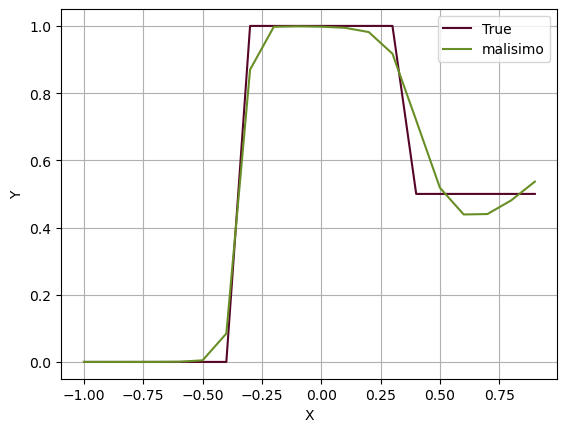

In [664]:
plt.plot(x, y, color = '#550527', label = 'True')
plt.plot(x, ypred, color = '#688E26', label = 'malisimo')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


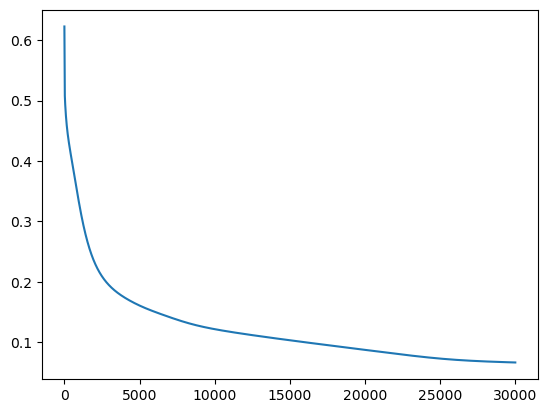

In [665]:
plt.plot(losses)

In [666]:
losses[-1]

0.06655271382035172

Ejercicio 1.2.3) Ajuste de hiperparàmetros
Una de las claves en el ML y también en las redes neuronales es el ajuste de los
hiperparàmetros. Dejando de lado la discusión de cuáles serìan en este caso los
hiperparàmetros, en este ejercicio vamos a analizar: i) el Learning Rate, ii) el Numer de epocas
(#E),, iii) la arquitectura de la redEmpecemos por analizar el LR y #E, para eso usaremos una arquitectura fija de 3 capas
ocultas con 3 neurona cada una (puede probar con otras si quiere)

a) Analicé como evoluciona la LF y la función predicha a medida que aumenta el #E (trate de
elegir un LR que de resultados significativos
¿que pasa si utiliza pocos pasos? ¿que pasa si utiliza demasiados?


b) Analicé como evoluciona la LF y la función predicha con diferentes LR (empiece en un valor
chico 0.1-1 e incremente de a 2-10x). ¿puede encontrar un valor (rango) de LR optimo?
Como en cualquier optimización en general a medida que uno se acerca al mínimo se deben
hacer pasos más pequeños. Pruebe implementar un LR que vaya decreciendo ¿còmo afecta el
mismo a la LF y a la función resultante?


c) Analicé (utilizando un #E y LR optimos) el resultado de la LF y función predicha para
diferentes arquitecturas (variando la capas ocultas). Comience con 1 capa de 1 neurona (1),
luego incremente en el número de neuronas (2), o en el número de capas (1,1), o ambas (2,2).
Etc, puede incluso avanzar a redes más complejas como (2,3,5,3,2) etc. ¿hay algun umbral
mínimo de neuronas o capas necesario para reproducir la funciòn razonablemente? ¿qué pasa
si el número es menor? ¿que pasa si aumentamos demasiado la complejidad?
Habiendo realizado el análisis propuesto, que puede decir del termino “overfitting”.